# Homework Assignment 2 - Question 5

## <u>Case Study</u>: Clustering and Missing Data Choices

Let's learn more about how data cleaning choices might affect our cluster analysis results.

In this case study we will first perform a cluster analysis on a two dimensional, artificial dataset (**dataset1.csv**) that has no missing values. Then we will perform a cluster analysis on this same dataset that now has some missing values (**dataset1_missing.csv**). We will try out the following methods of missing data cleaning and see how that affects our clustering results:
1. dropping the missing value rows
2. imputing the missing values with 0



### Imports

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
from pyclustertend import hopkins
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline



### 5.1. Full Dataset Cluster Analysis

The attached **dataset1.csv** file is the dataset in case study 1 that contains no missing values.

#### 5.1.1 [1.5 pt]  Read and visualize the 'full dataset'

Read the 'dataset1.csv' file into a dataframe.  Then plot a scatterplot of the data.

**You should use the plt.xlim([0,14]) and plt.ylim([0,14]) lines of code below to aid in the analysis and visualization**.

In [2]:
df_no_missing = pd.read_csv('dataset1.csv')
df_no_missing.head()

,x,y
0,10.705230,8.119633
1,8.934889,10.490133
2,11.167742,8.997835
3,9.696713,5.796868
4,9.387122,12.192666


In [5]:
df_no_missing.shape

(300, 2)

In [6]:
df_no_missing.describe()

,x,y
count,300.000000,300.000000
mean,9.972056,10.019372
std,0.697989,1.767069
min,7.715299,5.170847
25%,9.529000,8.767867
50%,9.979886,10.020059
75%,10.432473,11.290418
max,12.092064,14.433791


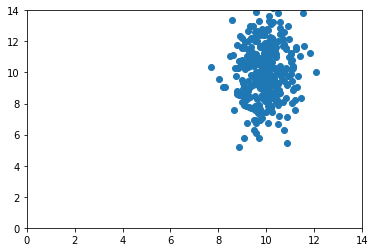

In [101]:
#Your code here
# plt.figure(figsize=(7,7))
plt.scatter(df_no_missing.x, df_no_missing.y)

#Use this code below (in addition to other code that you write above) to set the x-axis and y-axis plot limits to be between 0 to 14
plt.xlim([0,14])
plt.ylim([0,14])
plt.show()

#### 5.1.2. [0.5 pt] Visual assessment of clusterability

Using the scatterplot above, would you say that this dataset is clusterable?

> The above plot shows that there does not exist different clusters. There is no separation for a cluster to be formed.

#### 5.1.3. [1 pt] Quantitative assessment of clusterability

Calculate five Hopkin's statistics for this dataset.

(See the Lecture 3 Jupyter notebook for code assistance).

$ Hopkins Statistic = \frac{\sum_{i=1}^{p}w_i}{\sum_{i=1}^{p}w_i + \sum_{i=1}^{p}u_i}$

In [15]:
X = df_no_missing.copy()

In [56]:
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.3235986810443183, 0.3609385395938882, 0.2700611916143349, 0.34979430625954433, 0.31508473446487]


#### 5.1.4. [1 pt] Analysis of Hopkin's statistic

Do the Hopkin's statistics that you calculated suggest that this dataset is clusterable? Explain.

> Out of 5 Hopkins Statistics, 5 are closer to 0.5. This suggests that dataset is not clusterable.

#### 5.1.5. [1 pt] k-means elbow plot

Finally create a k-means elbow plot for this full dataset.

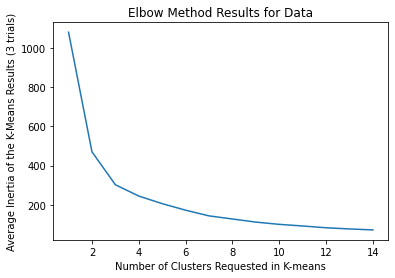

In [24]:
cluster_num_list=range(1,15)
avg_inertia_list=[]
for k in cluster_num_list:
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(X)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

#Plot it    
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Data')
plt.show()

> The elbow plot does not show a sharp bend rather a smooth decrease of inertia with increase of number of clusters.

> If we decide to go with k-means, by looking at the plot, it seems that 3 no. of clusters is the right choice for number of clusters.

### 5.2. Incomplete Dataset

The **dataset1_missing.csv** contains the same dataset as that in **dataset1.csv**, however some of the values are now considered to be missing. **The way that the missing entries in this csv are coded will be automatically detected and translated into NaN values by Python.**

#### 5.2.1 [0.5 pt] Read and visualize the 'incomplete dataset'

First, read this 'dataset1_missing.csv' into a new dataframe **call it df_missing**.

In [21]:
df_missing = pd.read_csv('dataset1_missing.csv')
df_missing.head()

,x,y
0,10.705230,8.119633
1,8.934889,10.490133
2,11.167742,8.997835
3,9.696713,5.796868
4,9.387122,12.192666


In [22]:
df_missing.describe()

,x,y
count,300.000000,198.000000
mean,9.972056,10.059045
std,0.697989,2.142087
min,7.715299,5.170847
25%,9.529000,8.262657
50%,9.979886,10.401848
75%,10.432473,11.756148
max,12.092064,14.433791


#### <u>Tutorial</u>: For detecting NaN values

We can use the **.isna()** pandas function to evaluate whether each value in a dataframe contains a NaN value.

**NaN**, standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable. It can be useful to use as a placeholder for or representative of a missing value entry in a numerical column in a dataframe. By represening these missing values as NaN, we are still able to perform mathematical functions on the numerical variable in the dataframe without getting errors.

In [3]:
import pandas as pd
tmp=pd.DataFrame({'col1':[None,4,None,2], 'col2': [None,3,7,8]})
tmp

,col1,col2
0,NaN,NaN
1,4.0,3.0
2,NaN,7.0
3,2.0,8.0


In [4]:
tmp.isna()

,col1,col2
0,True,True
1,False,False
2,True,False
3,False,False


We can furthermore use the pandas **.sum()** function to take the sum of each of the columns in a given dataframe. Generally, when we use a mathematical function in Python with Boolean values, the True values are automatically converted to a 1, and the False values are automatically converted to a 0.

In [5]:
tmp.isna().sum()

col1    2
col2    1
dtype: int64

Thus, by using the **tmp.isna().sum()** above, we add up all of the values in each column of the dataframe in which it is **True** that they are represented as a **NaN.**

#### 5.2.2. [0.5 pt] How many NaN values does each column of the data in the dataset1_missing.csv file contain?

In [27]:
df_missing.isna().sum()

x      0
y    102
dtype: int64

> column y contains aroung 102 NaN values

### 5.3. Incomplete Dataset - Dropping the Missing Value Rows

#### <u>Tutorial</u>: Dropping rows with NaN values

We can use the **.dropna()** pandas function to drop all rows in the given dataframe that contain a NaN value.

In [6]:
tmp=pd.DataFrame({'col1':[None,4,None,2], 'col2': [None,3,7,8]})
tmp

,col1,col2
0,NaN,NaN
1,4.0,3.0
2,NaN,7.0
3,2.0,8.0


In [7]:
tmp=tmp.dropna()
tmp

,col1,col2
1,4.0,3.0
3,2.0,8.0


#### 5.3.1. [1 pt] Create a new dataframe that has dropped all rows with missing values in df_missing.

In [28]:
df_missing_new = df_missing.dropna()
df_missing_new.describe()

,x,y
count,198.000000,198.000000
mean,9.957385,10.059045
std,0.674958,2.142087
min,8.477957,5.170847
25%,9.519536,8.262657
50%,9.944950,10.401848
75%,10.408862,11.756148
max,11.837278,14.433791


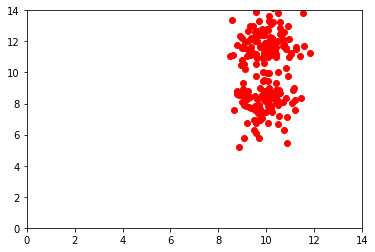

In [39]:
plt.scatter(df_missing_new.x, df_missing_new.y, c='red')

#Use this code below (in addition to other code that you write above) to set the x-axis and y-axis plot limits to be between 0 to 14
plt.xlim([0,14])
plt.ylim([0,14])
plt.show()

#### 5.3.2. [1 pt] Then, calculate five Hopkin's statistics for this dataframe that you created above in 5.3.1.

In [52]:
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(df_missing_new)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(df_missing_new,p))
print(hopkins_stats)

[0.4876875481348249, 0.4186908743103624, 0.39016778146099035, 0.3813598170397246, 0.4134296185858608]


#### 5.3.3. [1 pt] Do the Hopkin's statistics that you calculated suggest that this dataset is clusterable? Explain.

> Since the Hopkin's statistics values are more closer to 0.5 than 0, the Hopkin's statistic suggests that the dataset is not clusterable.

#### 5.3.4. [1 pt] k-means elbow plot

Create a k-means elbow plot for this dataframe that you created in 5.3.1.

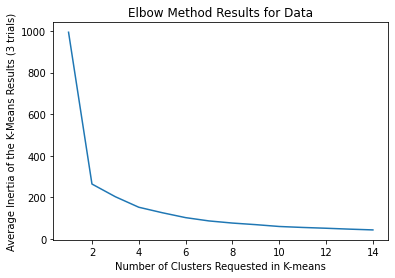

In [30]:
cluster_num_list=range(1,15)
avg_inertia_list=[]
for k in cluster_num_list:
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(df_missing_new)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

#Plot it    
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Data')
plt.show()

#### 5.3.5. [1 pt] Does this elbow plot suggest that the dataset with missing values dropped is clusterable? If so, how many clusters does this dataset have? Explain.

> Dataset with missing values dropped gives out two clusters.

> The elbow plot shows that when number of clusters are two, there is significant drop of inertia from only one cluster. We can cluster the dataset with two clusters.

#### 5.3.6. [0.5 pt] Do your answers about clusterability in 5.3.3 and 5.3.6 agree?

> These do not agree.

> Hopkin's statistic suggests that the dataset is not clusterable whereas elbow plot shows there could be two clusters.

#### 5.3.7. [1.5 pt] Use the fact that this is a two dimensional dataset (in which we can visualize both dimensions) to explain why the elbow plot for the full dataset in 5.1.5 looks different and suggests something different than the elbow plot for the dataset with missing values dropped in 5.3.4.

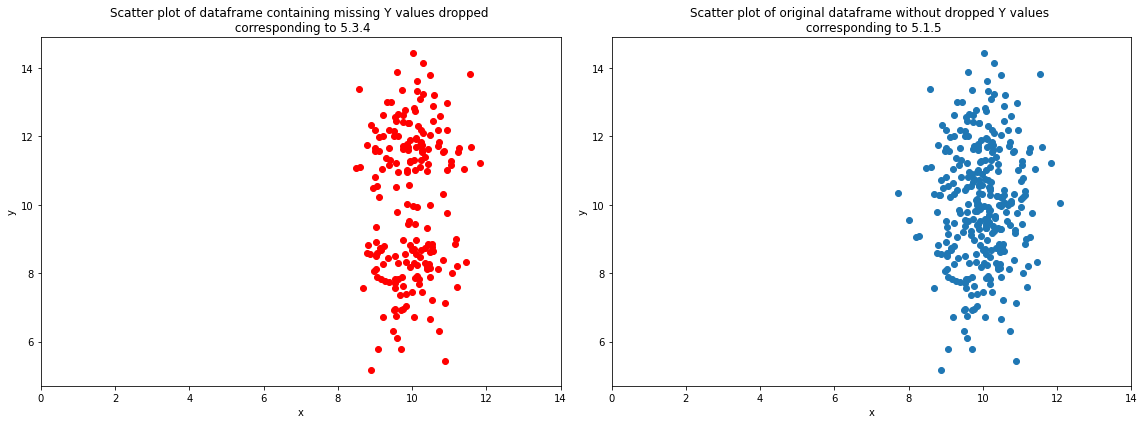

In [99]:
#Your code here
plt.figure(figsize=(16,6))
plt.subplot(121)

plt.scatter(df_missing_new.x, df_missing_new.y, c='r')
plt.title('Scatter plot of dataframe containing missing Y values dropped \n corresponding to 5.3.4')
plt.xlabel('x')
plt.ylabel('y')
#Use this code below (in addition to other code that you write above) to set the x-axis and y-axis plot limits to be between 0 to 14
plt.xlim([0,14])
plt.xlim([0,14])

plt.subplot(122)

plt.scatter(X.x, X.y)
plt.title('Scatter plot of original dataframe without dropped Y values \n corresponding to 5.1.5')
#Use this code below (in addition to other code that you write above) to set the x-axis and y-axis plot limits to be between 0 to 14
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,14])
plt.xlim([0,14])
plt.tight_layout()
plt.show()

> As can be seen from the above plots, the one on the left has some objects removed. This makes the elbow plot to bend sharper from one cluster inertia to two clusters inertia. Also, from the plot, we can see, there could be two clusters that can be formed.

> On the other hand, the original dataframe objects do not show any patterns of clusters. This is the reason, the elbow plot does not show any signs of clusterability.

### 5.4. Incomplete Dataset - Imputing the Missing Values with 0

#### <u>Tutorial</u>: Filling rows with NaN values

We can use the **.fillna()** pandas function to fill all NaN values in the given dataframe with a given value.

In [9]:
tmp=pd.DataFrame({'col1':[None,4,None,2], 'col2': [None,3,7,8]})
tmp

,col1,col2
0,NaN,NaN
1,4.0,3.0
2,NaN,7.0
3,2.0,8.0


For instance, the code below fills all NaN values with the value 20.

In [10]:
tmp=tmp.fillna(20)
tmp

,col1,col2
0,20.0,20.0
1,4.0,3.0
2,20.0,7.0
3,2.0,8.0


#### 5.4.1. [1 pt] Create a new dataframe that fills NaN values with 0 in df_missing.

In [83]:
df_missing_with_zeros = df_missing.fillna(0)
df_missing_with_zeros.describe()

,x,y
count,300.000000,300.000000
mean,9.972056,6.638970
std,0.697989,5.079855
min,7.715299,0.000000
25%,9.529000,0.000000
50%,9.979886,8.216145
75%,10.432473,11.290418
max,12.092064,14.433791


#### 5.4.2. [1 pt] Then, calculate five Hopkin's statistics for this dataframe that you created above in 5.4.1.

In [84]:
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(df_missing_with_zeros,p))
print(hopkins_stats)

[0.18976635771574207, 0.14642447126622382, 0.12628161541017716, 0.15880658771099312, 0.1358661615074133]


#### 5.4.3. [1 pt] Do the Hopkin's statistics that you calculated suggest that this dataset is clusterable? Explain.

> Since all of these Hopkin's statistics are closer to 0 compared to 0.5, Hopkin's statistic suggests that the dataset is cluterable.

#### 5.4.4. [1 pt] k-means elbow plot

Create a k-means elbow plot for this dataframe that you created in 5.4.1.

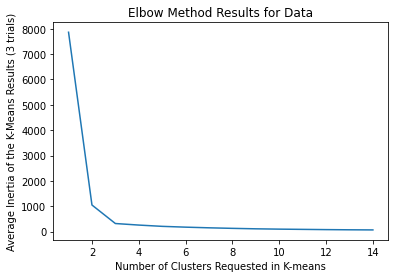

In [85]:
cluster_num_list=range(1,15)
avg_inertia_list=[]
for k in cluster_num_list:
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(df_missing_with_zeros)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

#Plot it    
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Data')
plt.show()

#### 5.4.5. [1 pt] Does this elbow plot suggest that the dataset with missing values dropped is clusterable? If so, how many clusters does it have? Explain.

> The elbow plot suggests that the dataset with missing values replaced with zeros is clusterable.

> It can be seen that there is a sharp drop of average inertia when we move from one cluster to two clusters. This drop continues till three clusters although the drop of avg. inertia from two clusters to three clusters is not as significant from one cluster to two, it is still considerable drop compared to clusters after that.

> The elbow plot suggests that there are three clusters.

#### 5.4.6. [1.5 pt] Use the fact that this is a two dimensional dataset (in which we can visualize both dimensions) to explain why the elbow plot for the full dataset in 5.1.5 looks different and suggests something different than the elbow plot for the dataset with missing values filled with 0 in 5.4.4.

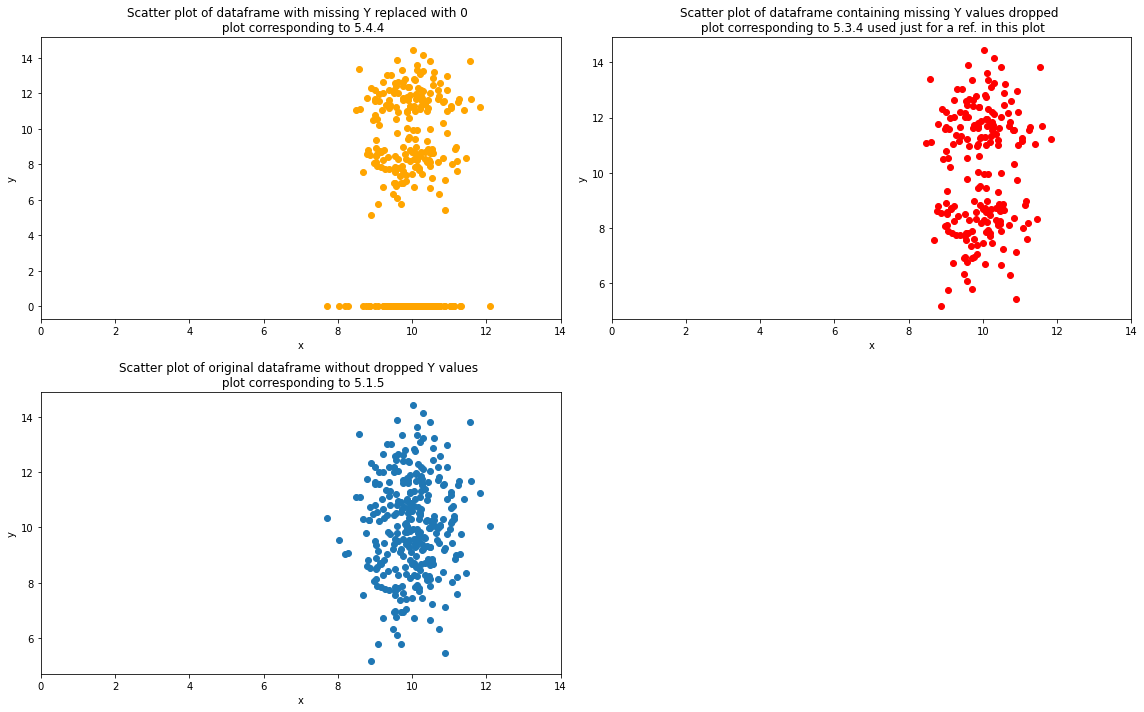

In [98]:
#Your code here
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.scatter(df_missing_with_zeros.x, df_missing_with_zeros.y, c='orange')
plt.title('Scatter plot of dataframe with missing Y replaced with 0  \n plot corresponding to 5.4.4')
plt.xlabel('x')
plt.ylabel('y')
#Use this code below (in addition to other code that you write above) to set the x-axis and y-axis plot limits to be between 0 to 14
plt.xlim([0,14])
plt.xlim([0,14])

plt.subplot(222)

plt.scatter(df_missing_new.x, df_missing_new.y, c='r')
plt.title('Scatter plot of dataframe containing missing Y values dropped \n plot corresponding to 5.3.4 used just for a ref. in this plot')
plt.xlabel('x')
plt.ylabel('y')
#Use this code below (in addition to other code that you write above) to set the x-axis and y-axis plot limits to be between 0 to 14
plt.xlim([0,14])
plt.xlim([0,14])

plt.subplot(223)

plt.scatter(X.x, X.y)
plt.title('Scatter plot of original dataframe without dropped Y values \n plot corresponding to 5.1.5')
#Use this code below (in addition to other code that you write above) to set the x-axis and y-axis plot limits to be between 0 to 14
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,14])
plt.xlim([0,14])
plt.tight_layout()
plt.show()

> As can be seen from the above plots, the first plot has missing Y objects replaced with 0. This makes the elbow plot to bend sharper from one cluster inertia to two clusters inertia till three cluster inertia. Also, from the plot, we can see, there could be three clusters that can be formed.

> On the other hand, the original dataframe objects (last plot) do not show any patterns of clusters. This is the reason, the elbow plot does not show any signs of clusterability.